In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import networkx as nx
import plotly.graph_objects as go
import ast

# Base de Informações

In [19]:
df_info = pd.read_excel('boardgame_info.xlsx')

#esse df está check, nada a ser excluído de momento

df_info.head()

object_id                                           name  yearpublished  \
0     174430                                     Gloomhaven           2017   
1     161936                      Pandemic Legacy  Season 1           2015   
2     167791                              Terraforming Mars           2016   
3     182028  Through the Ages  A New Story of Civilization           2015   
4     224517                              Brass  Birmingham           2018   

   sortindex  minplayers  maxplayers  minplaytime  maxplaytime  minage  
0          1           1           4           60          120      12  
1          2           2           4           60           60      13  
2          3           1           5          120          120      12  
3          4           2           4          120          120      14  
4          5           2           4           60          120      14

É legal saber que está em ordem decrescente de avaliação do BGG

In [20]:
df_info[df_info['object_id'] == 13].head()
#dando uma olhada no jogo com mais reviews

object_id                   name  yearpublished  sortindex  minplayers  \
352         13  The Settlers of Catan           1995        353           3   

     maxplayers  minplaytime  maxplaytime  minage  
352           4           60          120      10

In [21]:
df_info.describe()

object_id  yearpublished     sortindex    minplayers    maxplayers  \
count   20016.000000   20016.000000  20016.000000  20016.000000  20016.000000   
mean    88671.356815    1981.279976  10001.834782      2.055256      5.591427   
std     90648.089927     219.137802   5774.059572      0.745471     15.043261   
min         1.000000   -3500.000000      1.000000      0.000000      0.000000   
25%      5857.500000    1997.000000   5000.750000      2.000000      4.000000   
50%     39284.500000    2008.000000  10003.500000      2.000000      4.000000   
75%    169680.500000    2015.000000  15001.250000      2.000000      6.000000   
max    295770.000000    2021.000000  20000.000000     10.000000    999.000000   

        minplaytime    maxplaytime        minage  
count  20016.000000   20016.000000  20016.000000  
mean      68.080735      94.271533      9.475120  
std      466.317247    1005.354972      3.739411  
min        0.000000       0.000000      0.000000  
25%       20.000000      30.000000      8.000000  
50%       30.000000      45.000000     10.000000  
75%       60.000000      90.000000     12.000000  
max    60000.000000  120000.000000     25.000000

Como primeira interação com os dados, gosto de utilizar a informação da mediana de cada variável, ou até mesmo o terceiro quartil. Daqui tiramos algumas informações:
1-Metade dos jogos é de 2008 em diante;
2-Com dois jogadores, é possível jogar mais de três quartos dos jogos;
3-Em menos de 45' possível terminar mis de 50% dos jogos;
4-Maior parte dos jogos é relativamente simples (jogabilidade começa aos 12 anos de idade em 75% dos casos).

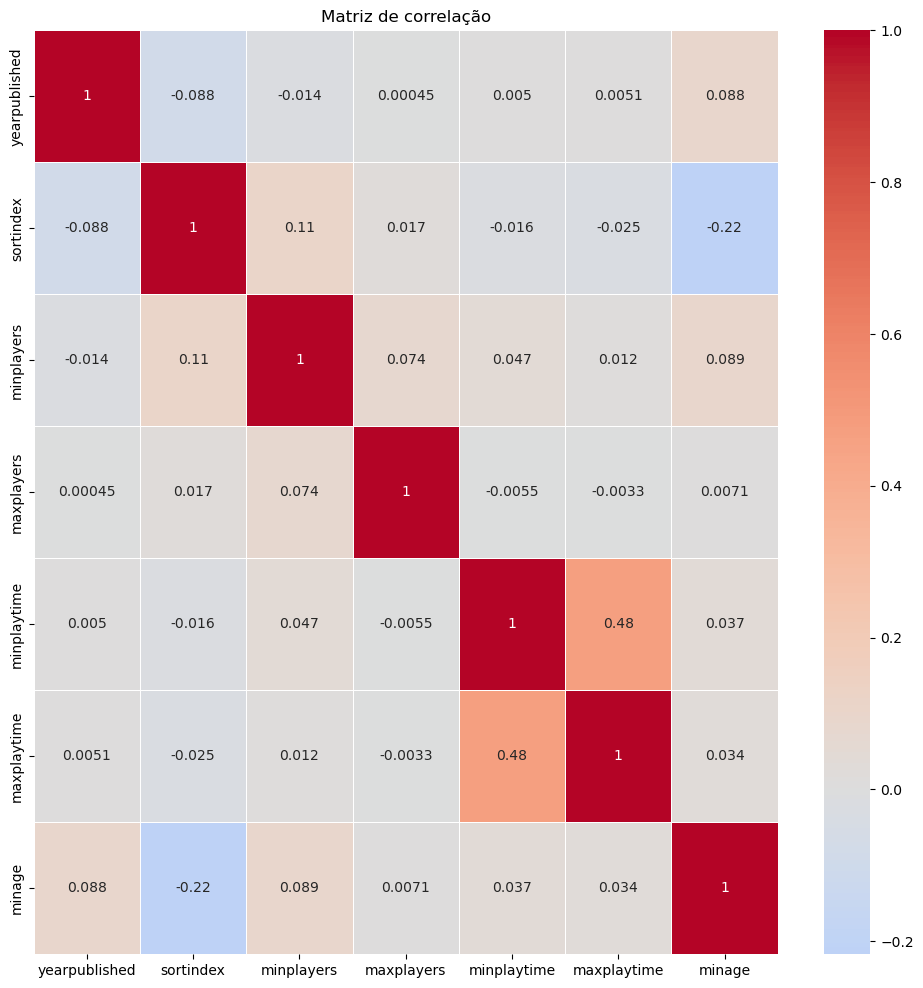

In [22]:
correlacao = df_info[['yearpublished','sortindex','minplayers','maxplayers','minplaytime','maxplaytime','minage']].corr()

plt.figure(figsize=(12, 12))
sns.heatmap(correlacao, annot=True, cmap="coolwarm", center=0, linewidths=0.5)
#criando matriz de correlação

plt.title('Matriz de correlação')

plt.show()

Usando uma matriz de correlação, vemos que as únicas variáveis numéricas com algum tipo de correlação são as de tempo mínimo e máximo de jogo, o que faz sentido, se um jogo tem tempo mínimo maior, seu tempo máximo tende a ser maior.

# Base de categorias

In [23]:
df_cat = pd.read_excel('boardgame_categoricals.xlsx')

df_cat.drop(labels=['label'], inplace=True, axis=1)
#todos os jogos são de tabuleiro, coluna inútil

df_cat.drop(labels=['gamelink'], inplace=True, axis=1)
#link que leva para o jogo, pode ser útil em caso de aprofundamento, mas não agora

df_cat.head()

objectid  boardgamedesigner_cnt  boardgameartist_cnt  \
0    174430                      1                    3   
1    161936                      2                    1   
2    167791                      1                    1   
3    182028                      1                    4   
4    224517                      3                    3   

   boardgamepublisher_cnt  boardgamehonor_cnt  boardgamecategory_cnt  \
0                       9                  23                      5   
1                      11                  20                      2   
2                      20                  20                      6   
3                      13                   3                      3   
4                       8                   6                      3   

   boardgamemechanic_cnt  boardgameexpansion_cnt  boardgameversion_cnt  \
0                     12                       4                    19   
1                      8                       0                    33   
2                      9                      15                    29   
3                      5                       1                    14   
4                      8                       0                     9   

   boardgamefamily_cnt                                  boardgamedesigner  \
0                    7                                ['Isaac Childres"']   
1                    3                   ['Rob Daviau"', 'Matt Leacock"']   
2                    6                               ['Jacob Fryxelius"']   
3                    2                          ['Vlaada Chv\\u00e1til"']   
4                    6  ['Gavan Brown"', 'Matt Tolman"', 'Martin Walla...   

                                     boardgameartist  \
0  ['Alexandr Elichev', 'Josh T. McDowell', 'Alva...   
1                                ['Chris Quilliams']   
2                                ['Isaac Fryxelius']   
3  ['Filip Murmak', 'Radim Pech', 'Jakub Politzer...   
4  ['Lina Cossette', 'David Forest', 'Damien Mamm...   

                                  boardgamepublisher  \
0  ['Cephalofair Games', 'Albi', 'Asmodee', 'Feue...   
1  ['Z-Man Games', 'Asterion Press', 'Devir', 'Fi...   
2  ['FryxGames', 'Arclight', 'Fantasmagoria', 'Gh...   
3  ['Czech Games Edition', 'Cranio Creations', 'D...   
4  ['Roxley', 'BoardM Factory', 'Conclave Editora...   

                                      boardgamehonor  \
0  ['2017 Best Science Fiction or Fantasy Board G...   
1  ['2015 Cardboard Republic Immersionist Laurel ...   
2  ['2016 Cardboard Republic Architect Laurel Nom...   
3  ['2015 Golden Geek Best Strategy Board Game No...   
4  ['2018 Golden Geek Best Board Game Artwork & P...   

                                   boardgamecategory  \
0  ['Adventure', 'Exploration', 'Fantasy', 'Fight...   
1                       ['Environmental', 'Medical']   
2  ['Economic', 'Environmental', 'Industry / Manu...   
3          ['Card Game', 'Civilization', 'Economic']   
4  ['Economic', 'Industry / Manufacturing', 'Tran...   

                                    boardgameversion  \
0  ['Chinese edition', 'Czech edition', 'English ...   
1  ['Chinese blue edition', 'Chinese red edition'...   
2  ['Bulgarian edition', 'Chinese edition', 'Czec...   
3  ['Chinese edition', 'Czech edition', 'English ...   
4  ['English deluxe edition', 'English retail edi...   

                                   boardgamemechanic  \
0  ['Campaign / Battle Card Driven', 'Cooperative...   
1  ['Action Points', 'Cooperative Game', 'Hand Ma...   
2  ['Card Drafting', 'End Game Bonuses', 'Hand Ma...   
3  ['Action Points', 'Auction/Bidding', 'Auction:...   
4  ['Hand Management', 'Income', 'Loans', 'Market...   

                                  boardgameexpansion  \
0  ['Gloomhaven: Forgotten Circles', 'Gloomhaven:...   
1                                           ['None']   
2  ['French Championship Promo Cards (fan expansi...   
3      ['Through the Ages: New Leaders and Wonders']   
4    

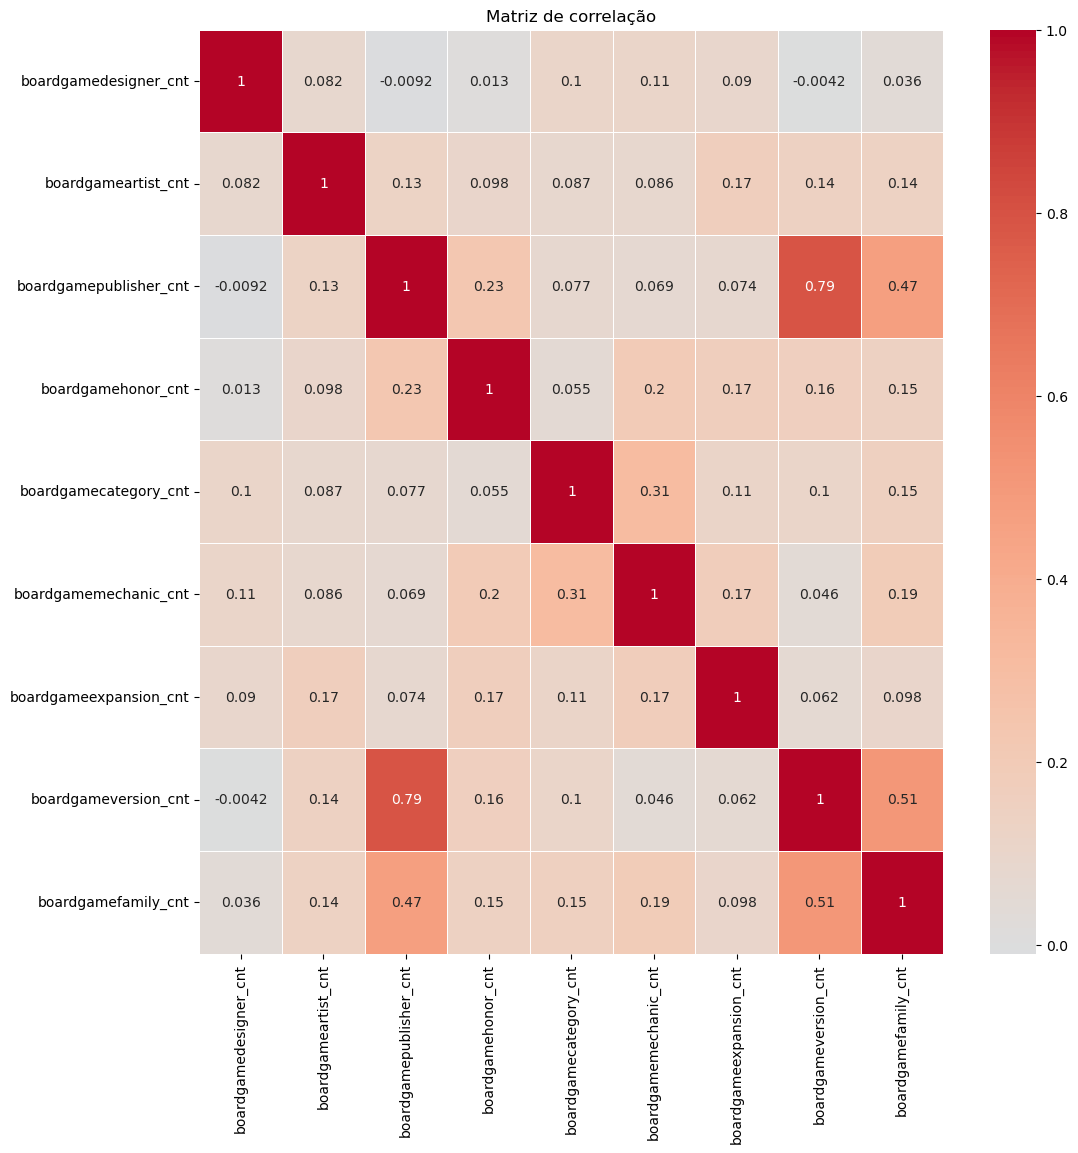

In [24]:
correlacao = df_cat[['boardgamedesigner_cnt','boardgameartist_cnt','boardgamepublisher_cnt','boardgamehonor_cnt','boardgamecategory_cnt','boardgamemechanic_cnt','boardgameexpansion_cnt','boardgameversion_cnt','boardgamefamily_cnt']].corr()

plt.figure(figsize=(12, 12))
sns.heatmap(correlacao, annot=True, cmap="coolwarm", center=0, linewidths=0.5)

plt.title('Matriz de correlação')

plt.show()

A principal correlação vista aqui é em relação à quantidade de publicadores dos jogos: quanto mais publicadores, mais versões o jogo tem, o que faz muito sentido do ponto de vista econômico. Há também uma leve correlação entre as duas variáveis citadas anteriormente, com a quantidade de famílias em que o jogo se enquadra, ou seja, quanto mais publicadores e mais edições o jogo tem, mais interdisciplinar ele tende a ser.

In [25]:
print(df_cat['boardgamedesigner'].str.count('Isaac Childres').sum())
print(df_cat['boardgamedesigner'].str.count('Jacob Fryxelius').sum())
print(df_cat['boardgamedesigner'].str.count('Rob Daviau').sum())
print(df_cat['boardgamedesigner'].str.count('Matt Leacock').sum())
print(df_cat['boardgamedesigner'].str.count('Vlaada Chv\\u00e1til').sum())
print(df_cat['boardgamedesigner'].str.count('Gavan Brown').sum())
print(df_cat['boardgamedesigner'].str.count('Matt Tolman').sum())

4
3
48
19
0
3
3


Avaliando a frequência dos desingners dos jogos mais bem avaliados, procurando por algum fora da curva. Analisaremos isso com os grafos mais adiante.

In [26]:
df = pd.read_excel('df_unificado1.xlsx')

In [27]:
#criando as classes de idade
for index, row in df.iterrows():
    if row['minage'] <= 6:
        df.loc[index,'age_class'] =  'early_child'
    if row['minage'] >= 7:
        df.loc[index,'age_class'] =  'grown_child'
    if row['minage'] >= 12:
        df.loc[index,'age_class'] =  'teenager'
    if row['minage'] >= 15:
        df.loc[index,'age_class'] =  'adult' 

In [28]:
fig = px.scatter(df, x="yearpublished", y="totalvotes", color="age_class",
                 size="boardgamehonor_cnt")
fig.update_xaxes(range=[1970, 2020])
fig.show()

Nesse gráfico, vemos algumas características interessantes:
1-Antes dos anos 2000, os jogos não possuiam uma quantidade relevante de votos e/ou premiações;
2-Os jogos mais votados(em certa medida, mais populares), são em geral, os mais premiados (de certa forma, melhores). Então, percebemos uma correlação entre popularidade de qualidade;
3-Os jogos mais populares e mais premiados, são os cujas idades mínimas abarcam crianças mais velhas e adolescentes;
4-Jogos para adultos são raríssimos, visto que há apenas um visível, discretamente, no gráfico;
5-Jogos para crianças pequenas possuem poquíssimos votos, e em geral, poucas premiações. Acreditamos que isso esteja atrelado ao fato de esses jogos serem extremamente simples, dado que crianças menores de 6 anos, raramente sabem ler.

In [29]:
fig = px.scatter(df, x="yearpublished", y="usersrated", color="age_class",
                 size="boardgamehonor_cnt")
fig.update_xaxes(range=[1970, 2020])
fig.show()

 Mesmo alterando a métrica de popularidade, entre 'totalvotes' e 'usersrated', a aparência dos gráficos, e portanto as conclusões, permanecem iguais. Dessa forma, em um possível modelo preditivo de regressão, poderíamos reduzir as dimensões, utilizando uma média entre elas, ou até mesmo eliminando alguma. Outro ponto que cabe citar, é uma possível tendência de queda na quantidade de jogos de destaque,  visto que os maiores são de 2010.

In [30]:
fig = px.scatter_3d(df, x='yearpublished', y='usersrated', z='boardgamecategory_cnt',
              color='age_class', size="boardgamehonor_cnt")
fig.update_layout(scene=dict(xaxis=dict(range=[1990, 2020])))
fig.update_layout(scene=dict(zaxis=dict(range=[0, 8])))
fig.show()

Como complemento dos dois gráficos anteriores, mas gora em 3D, vemos que a faixa de quantidade de categorias ideal para um jogo é de 1 a 5.

In [31]:
for index, row in df.iterrows():
    if row['minplayers'] == 0:
        df.loc[index,'group_class'] =  'no_group'
    if row['minplayers'] >= 1:
        df.loc[index,'group_class'] =  'small_group'
    if row['minplayers'] >= 3:
        df.loc[index,'group_class'] =  'mid_group'
    if row['minplayers'] >= 7:
        df.loc[index,'group_class'] =  'big_group' 

In [32]:
fig = px.scatter(df, x="yearpublished", y="usersrated", color="group_class",
                 size="boardgamehonor_cnt")
fig.update_xaxes(range=[1970, 2020])
fig.show()

In [33]:
fig = px.scatter(df, x="languagedependence", y="usersrated", color="age_class",
                 size="boardgamehonor_cnt")
fig.show()

In [34]:
fig = px.violin(df, y="boardgamehonor_cnt", x="age_class")
fig.show()

In [35]:
fig = px.violin(df, y="boardgamehonor_cnt", x="age_class")
fig.show()

In [36]:
dff = pd.read_excel('df_final.xlsx')

In [37]:
pd.set_option('display.max_columns', 50)

In [38]:
dff = dff[dff['Cluster'] == 2] #criando uma restrição de popularidade para simular o cluster
dff.head()

usersrated  numgeeklists  numwanting  numcomments  siteviews  news  blogs  \
0       31254          3657        1365         5972    8933078     7    471   
1       34729          3612         771         5477    2971746     9    597   
2       48339          5941        2068         7274    4724387    14   1158   
6       36644          9658        1341         8095    4506683     2    323   
7       18991          1956        1367         3037    2949888     1    204   

   weblink  podcast  average_tratado  baverage_tratado  Cluster  \
0       31      139          8.85292           8.58424        2   
1       69      164          8.62499           8.47159        2   
2       60      148          8.42299           8.26781        2   
6       84       82          8.31307           8.16138        2   
7       35       65          8.42602           8.15575        2   

   visibilidade externa                       name  objectid  \
0                   648                 Gloomhaven    174430   
1                   839  Pandemic Legacy  Season 1    161936   
2                  1380          Terraforming Mars    167791   
6                   491          Twilight Struggle     12333   
7                   305       Star Wars  Rebellion    187645   

                                   boardgamecategory  \
0  ['Adventure', 'Exploration', 'Fantasy', 'Fight...   
1                       ['Environmental', 'Medical']   
2  ['Economic', 'Environmental', 'Industry / Manu...   
6         ['Modern Warfare', 'Political', 'Wargame']   
7  ['Fighting', 'Miniatures', 'Movies / TV / Radi...   

                                   boardgamemechanic  \
0  ['Campaign / Battle Card Driven', 'Cooperative...   
1  ['Action Points', 'Cooperative Game', 'Hand Ma...   
2  ['Card Drafting', 'End Game Bonuses', 'Hand Ma...   
6  ['Action/Event', 'Advantage Token', 'Area Majo...   
7  ['Area Majority / Influence', 'Area Movement',...   

                                     boardgamefamily  
0  ['Campaign Games', 'Components: Miniatures', '...  
1           ['Campaign Games', 'Legacy', 'Pandemic']  
2  ['Fryxgames Future Timeline', 'Planets: Mars',...  
6  ['Cold War', 'Country: Soviet Union', 'Country...  
7            ['Components: Miniatures', 'Star Wars']

C:\Users\arthu\AppData\Local\Temp\ipykernel_16604\1356763864.py:19: UserWarning:



The arrowsize keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default value for arrowsize.
Note that using FancyArrowPatches may be slow for large graphs.




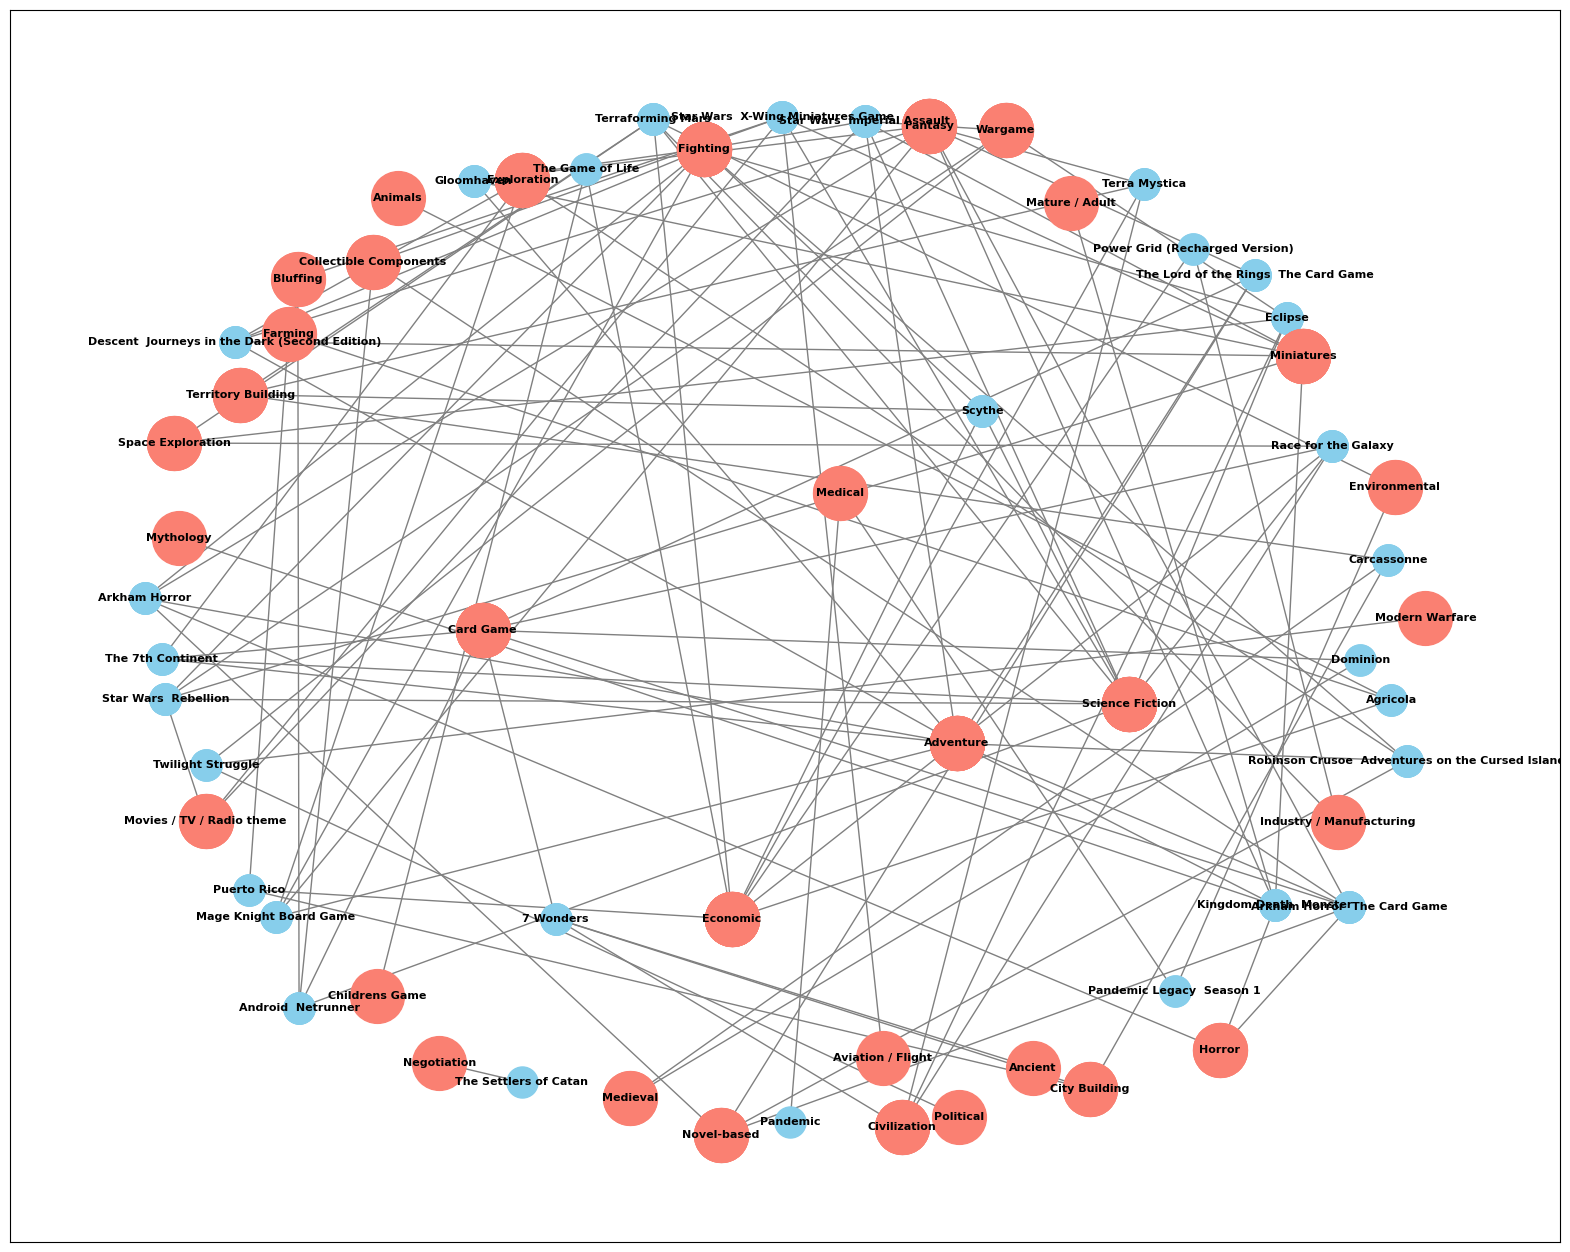

In [39]:
dff = pd.read_excel('df_final.xlsx')
dff = dff[dff['Cluster'] == 2]
dff['category'] = dff['boardgamecategory'].apply(ast.literal_eval)
dff_explodido = dff.explode('category').reset_index(drop=True)
G = nx.Graph()
G.add_nodes_from(dff_explodido['name'].unique(), bipartite=0)
G.add_nodes_from(dff_explodido['category'].unique(), bipartite=1)

for _, row in dff_explodido.iterrows():
    G.add_edge(row['name'], row['category'])

cores = {'name': 'skyblue', 'category': 'salmon'}

pos = nx.spring_layout(G, k=2)
fig, ax = plt.subplots(figsize=(20, 16))
# Desenho do grafo
nx.draw_networkx_nodes(G, pos, nodelist=dff_explodido['name'], node_color=cores['name'], node_size=500)
nx.draw_networkx_nodes(G, pos, nodelist=dff_explodido['category'], node_color=cores['category'], node_size=1500)
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), edge_color='gray', arrowsize=3)
nx.draw_networkx_labels(G, pos, font_size=8, font_weight='bold')

plt.show()

C:\Users\arthu\AppData\Local\Temp\ipykernel_16604\3917402898.py:19: UserWarning:



The arrowsize keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default value for arrowsize.
Note that using FancyArrowPatches may be slow for large graphs.




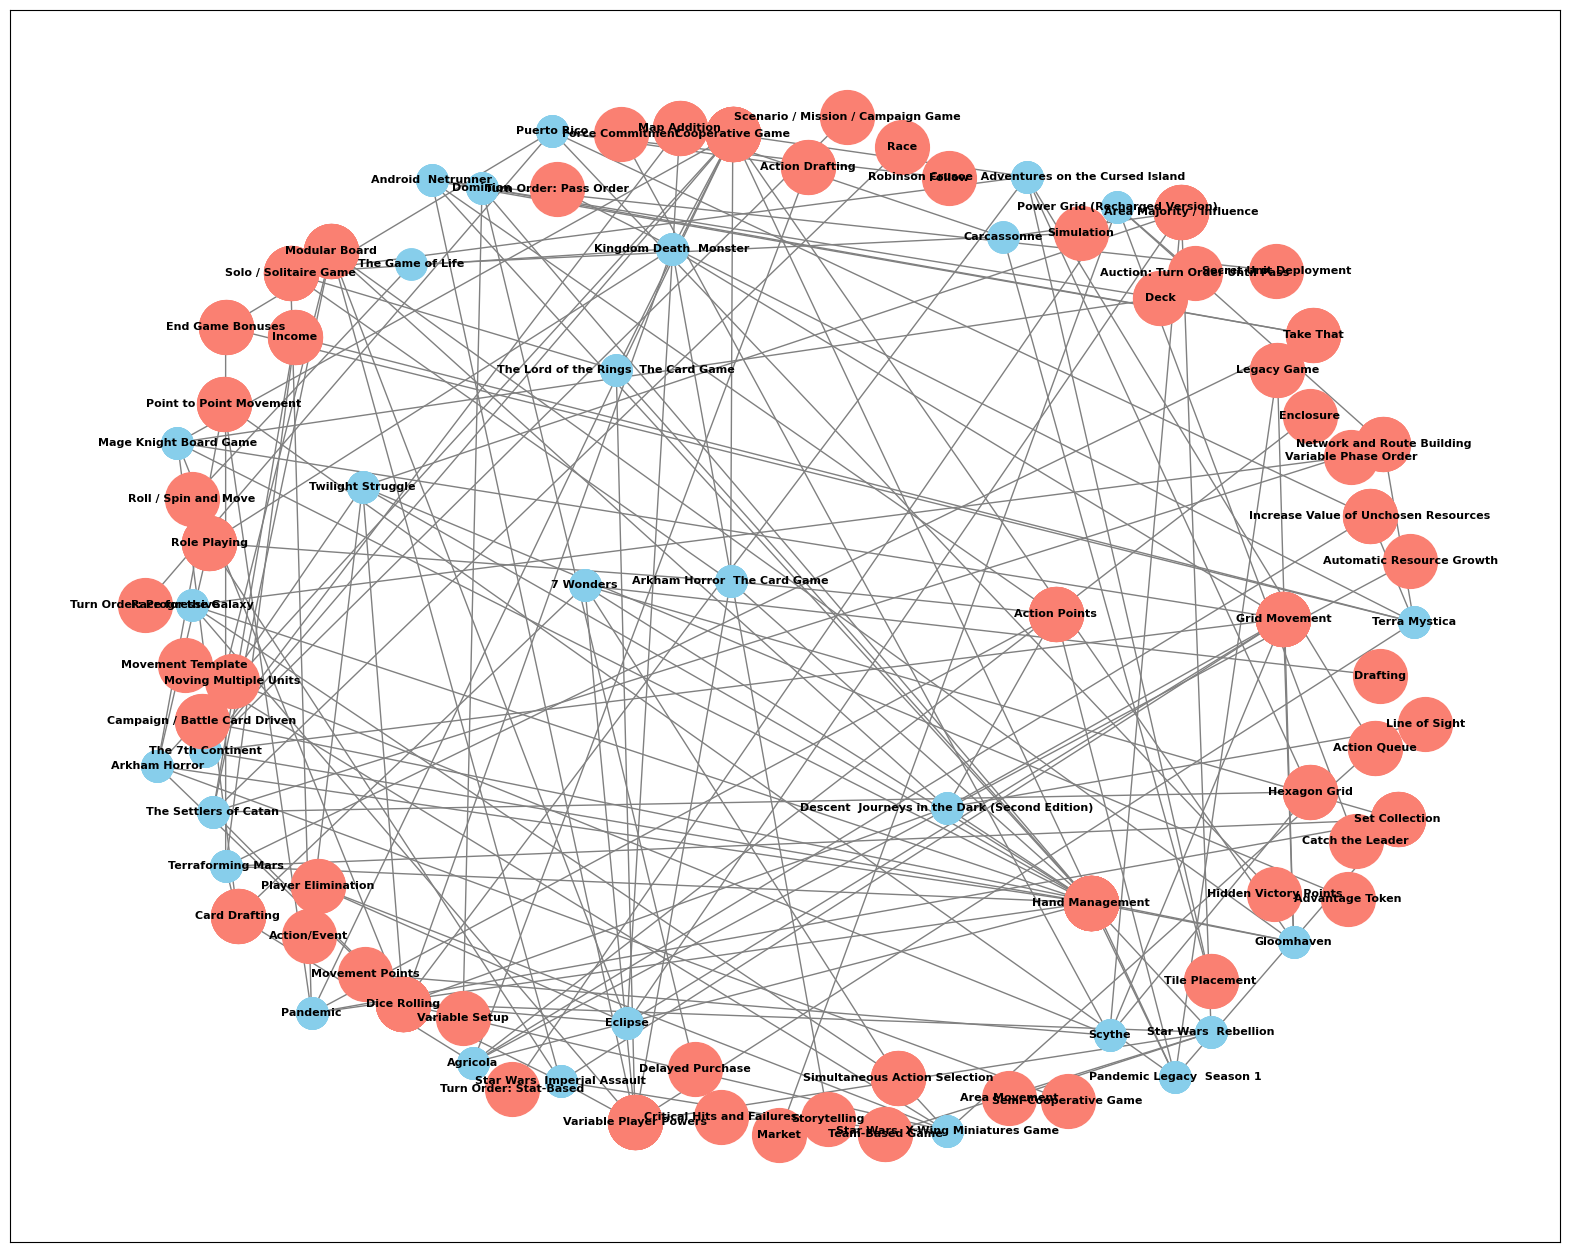

In [40]:
dff = pd.read_excel('df_final.xlsx')
dff = dff[dff['Cluster'] == 2]
dff['category'] = dff['boardgamemechanic'].apply(ast.literal_eval)
dff_explodido = dff.explode('category').reset_index(drop=True)
G = nx.Graph()
G.add_nodes_from(dff_explodido['name'].unique(), bipartite=0)
G.add_nodes_from(dff_explodido['category'].unique(), bipartite=1)

for _, row in dff_explodido.iterrows():
    G.add_edge(row['name'], row['category'])

cores = {'name': 'skyblue', 'category': 'salmon'}

pos = nx.spring_layout(G, k=2)
fig, ax = plt.subplots(figsize=(20, 16))
# Desenho do grafo
nx.draw_networkx_nodes(G, pos, nodelist=dff_explodido['name'], node_color=cores['name'], node_size=500)
nx.draw_networkx_nodes(G, pos, nodelist=dff_explodido['category'], node_color=cores['category'], node_size=1500)
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), edge_color='gray', arrowsize=3)
nx.draw_networkx_labels(G, pos, font_size=8, font_weight='bold')

plt.show()

In [41]:
import pandas as pd
import networkx as nx
import plotly.graph_objects as go
import ast

# Carregar os dados
dff = pd.read_excel('df_final.xlsx')
dff = dff[dff['Cluster'] == 2]
dff['category'] = dff['boardgamemechanic'].apply(ast.literal_eval)
dff_exploded = dff.explode('category').reset_index(drop=True)

# Criar o grafo
G = nx.Graph()
G.add_nodes_from(dff_exploded['name'].unique(), bipartite=0)
G.add_nodes_from(dff_exploded['category'].unique(), bipartite=1)

for _, row in dff_exploded.iterrows():
    G.add_edge(row['name'], row['category'])

# Cores dos nós
cores = {'name': 'skyblue', 'category': 'salmon'}

# Layout do grafo
pos = nx.spring_layout(G, k=2)

# Nós e arestas
node_trace = go.Scatter(
    x=[pos[node][0] for node in G.nodes()],
    y=[pos[node][1] for node in G.nodes()],
    mode='markers',
    hoverinfo='text',
    marker=dict(
        size=[500 if node in dff_exploded['name'].unique() else 1500 for node in G.nodes()],
        color=[cores['name'] if node in dff_exploded['name'].unique() else cores['category'] for node in G.nodes()]
    ),
    text=[node for node in G.nodes()]
)

edge_trace = go.Scatter(
    x=[],
    y=[],
    line=dict(width=0.5, color='gray'),
    hoverinfo='none',
    mode='lines'
)

for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_trace['x'] += [x0, x1, None]
    edge_trace['y'] += [y0, y1, None]

# Plot
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title='Grafo de Inter-relacionamentos',
                    titlefont_size=16,
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=20, l=5, r=5, t=40),
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()

TypeError: can only concatenate tuple (not "list") to tuple

In [ ]:
import pandas as pd
import networkx as nx
import plotly.graph_objects as go
import ast

# Carregar os dados
dff = pd.read_excel('df_final.xlsx')
dff = dff[dff['Cluster'] == 2]
dff['category'] = dff['boardgamemechanic'].apply(ast.literal_eval)
dff_exploded = dff.explode('category').reset_index(drop=True)

# Criar o grafo
G = nx.Graph()
G.add_nodes_from(dff_exploded['name'].unique(), bipartite=0)
G.add_nodes_from(dff_exploded['category'].unique(), bipartite=1)

for _, row in dff_exploded.iterrows():
    G.add_edge(row['name'], row['category'])

# Cores dos nós
cores = {'name': 'skyblue', 'category': 'salmon'}

# Layout do grafo
pos = nx.spring_layout(G, k=2)

# Nós e arestas
node_trace = go.Scatter(
    x=tuple(pos[node][0] for node in G.nodes()),
    y=tuple(pos[node][1] for node in G.nodes()),
    mode='markers',
    hoverinfo='text',
    marker=dict(
        size=[500 if node in dff_exploded['name'].unique() else 1500 for node in G.nodes()],
        color=[cores['name'] if node in dff_exploded['name'].unique() else cores['category'] for node in G.nodes()]
    ),
    text=[node for node in G.nodes()]
)

edge_trace = go.Scatter(
    x=[],
    y=[],
    line=dict(width=0.5, color='gray'),
    hoverinfo='none',
    mode='lines'
)

for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_trace['x'] += [x0, x1, None]
    edge_trace['y'] += [y0, y1, None]

# Plot
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title='Grafo de Inter-relacionamentos',
                    titlefont_size=16,
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=20, l=5, r=5, t=40),
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()

TypeError: can only concatenate tuple (not "list") to tuple

In [ ]:
import pandas as pd
import networkx as nx
import plotly.graph_objects as go
import ast

# Carregar os dados
dff = pd.read_excel('df_final.xlsx')
dff = dff[dff['Cluster'] == 2]
dff['category'] = dff['boardgamemechanic'].apply(ast.literal_eval)
dff_exploded = dff.explode('category').reset_index(drop=True)

# Criar o grafo
G = nx.Graph()
G.add_nodes_from(dff_exploded['name'].unique(), bipartite=0)
G.add_nodes_from(dff_exploded['category'].unique(), bipartite=1)

for _, row in dff_exploded.iterrows():
    G.add_edge(row['name'], row['category'])

# Cores dos nós
cores = {'name': 'skyblue', 'category': 'salmon'}

# Layout do grafo
pos = nx.spring_layout(G, k=2)

# Nós e arestas
node_trace = go.Scatter(
    x=tuple(pos[node][0] for node in G.nodes()),
    y=tuple(pos[node][1] for node in G.nodes()),
    mode='markers',
    hoverinfo='text',
    marker=dict(
        size=[500 if node in dff_exploded['name'].unique() else 1500 for node in G.nodes()],
        color=[cores['name'] if node in dff_exploded['name'].unique() else cores['category'] for node in G.nodes()]
    ),
    text=[node for node in G.nodes()]
)

edge_trace = go.Scatter(
    x=[],
    y=[],
    line=dict(width=0.5, color='gray'),
    hoverinfo='none',
    mode='lines'
)

for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_trace['x'] += [x0, x1, None]
    edge_trace['y'] += [y0, y1, None]

# Plot
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title='Grafo de Inter-relacionamentos',
                    titlefont_size=16,
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=20, l=5, r=5, t=40),
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()

TypeError: can only concatenate tuple (not "list") to tuple

In [ ]:
import pandas as pd
import networkx as nx
import plotly.graph_objects as go
import ast

# Carregar os dados
dff = pd.read_excel('df_final.xlsx')
dff = dff[dff['Cluster'] == 2]
dff['category'] = dff['boardgamemechanic'].apply(ast.literal_eval)
dff_exploded = dff.explode('category').reset_index(drop=True)

# Criar o grafo
G = nx.Graph()
G.add_nodes_from(dff_exploded['name'].unique(), bipartite=0)
G.add_nodes_from(dff_exploded['category'].unique(), bipartite=1)

for _, row in dff_exploded.iterrows():
    G.add_edge(row['name'], row['category'])

# Cores dos nós
cores = {'name': 'skyblue', 'category': 'salmon'}

# Layout do grafo
pos = nx.spring_layout(G, k=2)

# Nós e arestas
node_trace = go.Scatter(
    x=tuple(pos[node][0] for node in G.nodes()),
    y=tuple(pos[node][1] for node in G.nodes()),
    mode='markers',
    hoverinfo='text',
    marker=dict(
        size=[500 if node in dff_exploded['name'].unique() else 1500 for node in G.nodes()],
        color=[cores['name'] if node in dff_exploded['name'].unique() else cores['category'] for node in G.nodes()]
    ),
    text=[node for node in G.nodes()]
)

edge_trace = go.Scatter(
    x=[],  # Inicializamos como uma lista vazia
    y=[],  # Inicializamos como uma lista vazia
    line=dict(width=0.5, color='gray'),
    hoverinfo='none',
    mode='lines'
)

for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_trace['x'] += [x0, x1, None]
    edge_trace['y'] += [y0, y1, None]

# Plot
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title='Grafo de Inter-relacionamentos',
                    titlefont_size=16,
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=20, l=5, r=5, t=40),
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()

TypeError: can only concatenate tuple (not "list") to tuple

In [ ]:
import pandas as pd
import networkx as nx
import plotly.graph_objects as go
import ast

# Carregar os dados
dff = pd.read_excel('df_final.xlsx')
dff = dff[dff['Cluster'] == 2]
dff['category'] = dff['boardgamemechanic'].apply(ast.literal_eval)
dff_exploded = dff.explode('category').reset_index(drop=True)

# Criar o grafo
G = nx.Graph()
G.add_nodes_from(dff_exploded['name'].unique(), bipartite=0)
G.add_nodes_from(dff_exploded['category'].unique(), bipartite=1)

for _, row in dff_exploded.iterrows():
    G.add_edge(row['name'], row['category'])

# Cores dos nós
cores = {'name': 'skyblue', 'category': 'salmon'}

# Layout do grafo
pos = nx.spring_layout(G, k=2)

# Nós e arestas
node_trace = go.Scatter(
    x=[pos[node][0] for node in G.nodes()],
    y=[pos[node][1] for node in G.nodes()],
    mode='markers',
    hoverinfo='text',
    marker=dict(
        size=[500 if node in dff_exploded['name'].unique() else 1500 for node in G.nodes()],
        color=[cores['name'] if node in dff_exploded['name'].unique() else cores['category'] for node in G.nodes()]
    ),
    text=[node for node in G.nodes()]
)

edge_trace = go.Scatter(
    x=[],  # Inicializamos como uma lista vazia
    y=[],  # Inicializamos como uma lista vazia
    line=dict(width=0.5, color='gray'),
    hoverinfo='none',
    mode='lines'
)

for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_trace['x'] += [x0, x1, None]
    edge_trace['y'] += [y0, y1, None]

# Plot
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title='Grafo de Inter-relacionamentos',
                    titlefont_size=16,
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=20, l=5, r=5, t=40),
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()

TypeError: can only concatenate tuple (not "list") to tuple

In [ ]:
import pandas as pd
import networkx as nx
import plotly.graph_objects as go
import ast

# Carregar os dados
dff = pd.read_excel('df_final.xlsx')
dff = dff[dff['Cluster'] == 2]
dff['category'] = dff['boardgamemechanic'].apply(ast.literal_eval)
dff_exploded = dff.explode('category').reset_index(drop=True)

# Criar o grafo
G = nx.Graph()
G.add_nodes_from(dff_exploded['name'].unique(), bipartite=0)
G.add_nodes_from(dff_exploded['category'].unique(), bipartite=1)

for _, row in dff_exploded.iterrows():
    G.add_edge(row['name'], row['category'])

# Cores dos nós
cores = {'name': 'skyblue', 'category': 'salmon'}

# Layout do grafo
pos = nx.spring_layout(G, k=2)

# Nós e arestas
node_trace = go.Scatter(
    x=[],
    y=[],
    mode='markers',
    hoverinfo='text',
    marker=dict(
        size=[500 if node in dff_exploded['name'].unique() else 1500 for node in G.nodes()],
        color=[cores['name'] if node in dff_exploded['name'].unique() else cores['category'] for node in G.nodes()]
    ),
    text=[node for node in G.nodes()]
)

for node in G.nodes():
    x, y = pos[node]
    node_trace['x'] += [x]
    node_trace['y'] += [y]

edge_trace = go.Scatter(
    x=[],  
    y=[],  
    line=dict(width=0.5, color='gray'),
    hoverinfo='none',
    mode='lines'
)

for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_trace['x'] += [x0, x1, None]
    edge_trace['y'] += [y0, y1, None]

# Plot
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title='Grafo de Inter-relacionamentos',
                    titlefont_size=16,
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=20, l=5, r=5, t=40),
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()

TypeError: can only concatenate tuple (not "list") to tuple

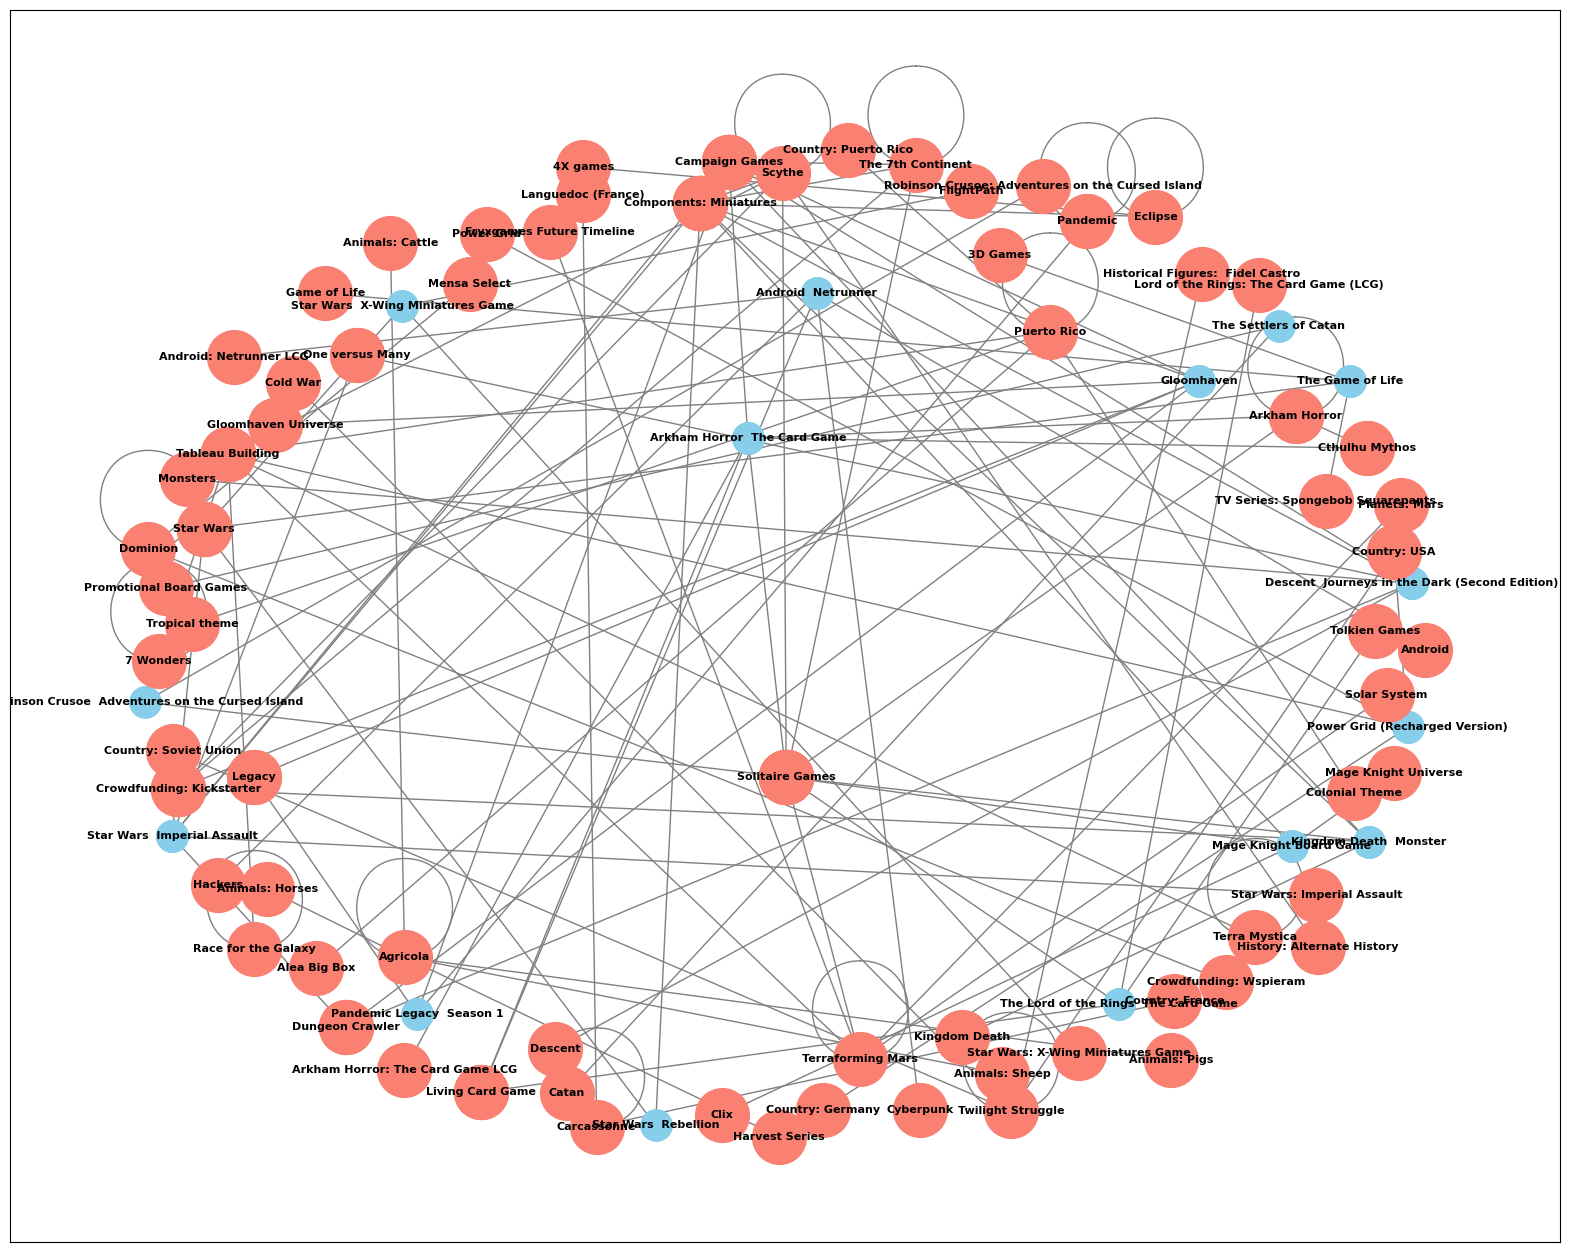

In [ ]:
dff = pd.read_excel('df_final.xlsx')
dff = dff[dff['Cluster'] == 2]
dff['category'] = dff['boardgamefamily'].apply(ast.literal_eval)
dff_explodido = dff.explode('category').reset_index(drop=True)
G = nx.Graph()
G.add_nodes_from(dff_explodido['name'].unique(), bipartite=0)
G.add_nodes_from(dff_explodido['category'].unique(), bipartite=1)

for _, row in dff_explodido.iterrows():
    G.add_edge(row['name'], row['category'])

cores = {'name': 'skyblue', 'category': 'salmon'}

pos = nx.spring_layout(G, k=2)
fig, ax = plt.subplots(figsize=(20, 16))
# Desenho do grafo
nx.draw_networkx_nodes(G, pos, nodelist=dff_explodido['name'], node_color=cores['name'], node_size=500)
nx.draw_networkx_nodes(G, pos, nodelist=dff_explodido['category'], node_color=cores['category'], node_size=1500)
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), edge_color='gray', arrowsize=3)
nx.draw_networkx_labels(G, pos, font_size=8, font_weight='bold')

plt.show()

In [ ]:
dff.shape

(22, 36)

In [ ]:
category_count = {}
for i in dff['category']:
    for j in i:
        category_count[j] = category_count.get(j, 0) + 1
category_count = pd.DataFrame.from_dict(category_count, orient='index', columns=['contagem'])
category_count.sort_values(by=['contagem'], ascending=False, inplace=True)
category_count.reset_index(names='categoria', inplace=True)
fig_categoria = px.bar(category_count.head(10), x='categoria', y='contagem')
fig_categoria.show()

In [ ]:
dff['category'] = dff['boardgamecategory'].apply(ast.literal_eval)
dff_explodido = dff.explode('category').reset_index(drop=True)
category_count = {}
for i in dff['category']:
    for j in i:
        category_count[j] = category_count.get(j, 0) + 1
category_count = pd.DataFrame.from_dict(category_count, orient='index', columns=['contagem'])
category_count.sort_values(by=['contagem'], ascending=False, inplace=True)
category_count.reset_index(names='categoria', inplace=True)
fig_categoria = px.bar(category_count.head(10), x='categoria', y='contagem')
fig_categoria.show()

In [ ]:
df_cluster = pd.read_excel('df_cluster_2.xlsx')

In [ ]:
df_cluster.head()

Unnamed: 0  usersrated  numgeeklists  numwanting  numcomments  siteviews  \
0           0       31254          3657        1365         5972    8933078   
1           1       34729          3612         771         5477    2971746   
2           2       48339          5941        2068         7274    4724387   
3           3       18269          2083        1049         2660    2448074   
4           6       36644          9658        1341         8095    4506683   

   news  blogs  weblink  podcast  average_tratado  baverage_tratado  Cluster  \
0     7    471       31      139          8.85292           8.58424        2   
1     9    597       69      164          8.62499           8.47159        2   
2    14   1158       60      148          8.42299           8.26781        2   
3     5    185       30       42          8.49419           8.23513        2   
4     2    323       84       82          8.31307           8.16138        2   

                                            name  objectid  
0                                     Gloomhaven    174430  
1                      Pandemic Legacy  Season 1    161936  
2                              Terraforming Mars    167791  
3  Through the Ages  A New Story of Civilization    182028  
4                              Twilight Struggle     12333